**DS_C3_SC1 - PLATAFORMAS DE VISUALIZACIÓN**

---

**Reto: Explorando el índice de felicidad**

NOMBRE DEL PARTICIPANTE: ERICK ANTONIO ALTAMIRANO CALIX

1.	Genera una libreta en Google Colab para el reto, cuya estructura esté basada en los análisis solicitados.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

2.	Descarga el archivo: happiness_report.csv y guarda, en un dataframe (`happiness`), todos sus registros.

In [2]:
happiness = pd.read_csv("/content/sample_data/happiness_report.csv")

happiness.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


3.	A partir del dataframe happiness obtén otro (`mexico`) donde sólo almacenes la información de México. Haz que la columna `Country or region` quede como índice. 

In [3]:
mexico = happiness.loc[happiness['Country or region'] == 'Mexico']

mexico.set_index('Country or region', inplace= True)

mexico.head(1)

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Mexico,23,6.595,1.07,1.323,0.861,0.433,0.074,0.073


4.	Obtén un histograma del puntaje (`score`) para identificar el rango o clase más frecuente. Ubica el valor de México con una etiqueta de texto. 

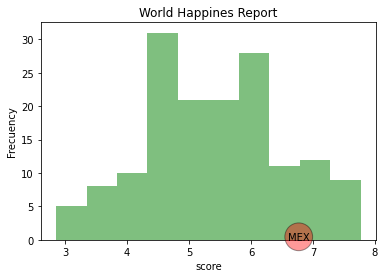

In [80]:
plt.hist(happiness['Score'],facecolor='g',alpha=0.5)

plt.text(6.595,0,'MEX',bbox={'boxstyle':'circle','facecolor':'red','alpha':0.4})
plt.xlabel('score')
plt.ylabel('Frecuency')
plt.title('World Happines Report')
plt.show()

5.	Construye un box plot para la columna esperanza de vida (`Healthy life expectancy`). Ubica el valor de México con una anotación.

Text(1.2, 0.861, 'MEX')

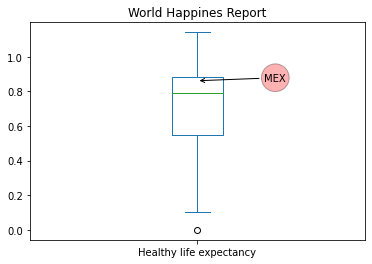

In [73]:
happiness['Healthy life expectancy'].plot.box()

plt.title('World Happines Report')

plt.annotate('MEX',xy=(1,0.861),xytext=(1.2,0.861),arrowprops=dict(arrowstyle='->'),bbox=dict( boxstyle='circle',facecolor='red',alpha=0.3))


6.	Crea una gráfico circular para analizar en qué medida los factores contribuyen a evaluar la felicidad en México. Para ello, deberás modificar la estructura del dataframe `mexico` obtenido anteriormente.

In [6]:
mexico = mexico.drop(columns=['Overall rank','Score'])

In [7]:
mexico = mexico.T

In [8]:
mexico.index.name = ''
mexico.columns.name = ''
mexico.columns = ['Factores']

mexico

,Factores
,
GDP per capita,1.070
Social support,1.323
Healthy life expectancy,0.861
Freedom to make life choices,0.433
Generosity,0.074
Perceptions of corruption,0.073


Text(0.5, 1.0, 'Contribution in México happiness score')

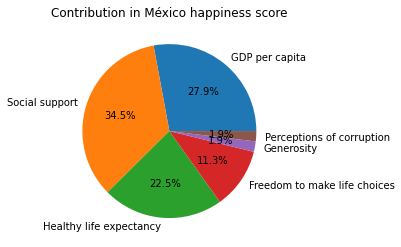

In [9]:
mexico['Factores'].plot(kind='pie',ylabel='', autopct='%1.1f%%')
plt.title('Contribution in México happiness score')

7.	Filtra el dataframe para quedarte con 5 países (el más feliz, el menos feliz, México y dos más de tu interés) y visualiza en una misma gráfica los 6 factores.

In [10]:
paises = happiness[(happiness['Country or region']=='Finland')|
        (happiness['Country or region']=='South Sudan')|
        (happiness['Country or region']=='Mexico')|
        (happiness['Country or region']=='France')|
        (happiness['Country or region']=='Spain')] 

paises.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
22,23,Mexico,6.595,1.070,1.323,0.861,0.433,0.074,0.073
23,24,France,6.592,1.324,1.472,1.045,0.436,0.111,0.183
29,30,Spain,6.354,1.286,1.484,1.062,0.362,0.153,0.079
155,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091


In [11]:
paises.set_index('Country or region', inplace= True)

paises = paises.drop(columns=['Overall rank','Score'])

In [12]:
paises = paises.T

Text(0.5, 1.0, 'World Happiness Report')

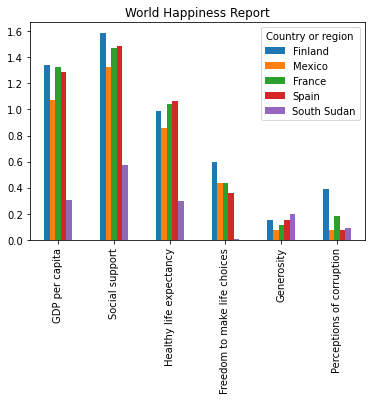

In [13]:
paises.plot(kind='bar')
plt.title('World Happiness Report')

8.	Crea una matriz de subgráficas de 2 x 3 con scatter plots del puntaje (`score`) versus los 6 factores para determinar qué factor influye más en la evaluación.

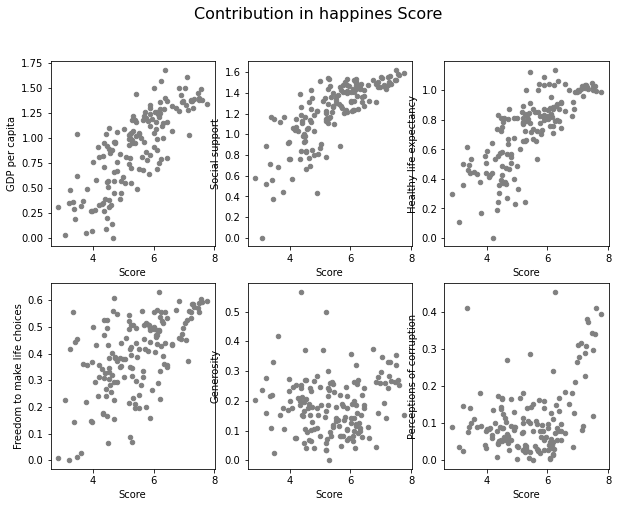

In [22]:

fig,axs = plt.subplots(2,3,figsize=(10,7.5))


fig.suptitle('Contribution in happines Score ',fontsize=16) 

happiness.plot(kind='scatter',x='Score',y='GDP per capita',color='grey',ax=axs[0,0])
happiness.plot(kind='scatter',x='Score',y='Social support',color='grey',ax=axs[0,1])
happiness.plot(kind='scatter',x='Score',y='Healthy life expectancy',color='grey',ax=axs[0,2])
happiness.plot(kind='scatter',x='Score',y='Freedom to make life choices',color='grey',ax=axs[1,0])
happiness.plot(kind='scatter',x='Score',y='Generosity',color='grey',ax=axs[1,1])
happiness.plot(kind='scatter',x='Score',y='Perceptions of corruption',color='grey',ax=axs[1,2])



9.	Comprueba lo anterior con un heatmap donde incluyas los índices de correlación.

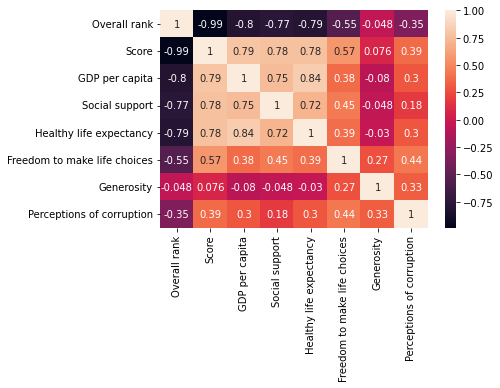

In [84]:
sns.heatmap(happiness.corr(), annot=True)

10.	Combina con el dataframe `metada` (Metadata.csv) para graficar la felicidad promedio por región. 

In [87]:
metadata = pd.read_csv('/content/sample_data/Metadata.csv')

In [88]:
#Revizar la lección 3

metadata

,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,ABW,Latin America & Caribbean,High income,NaN,Aruba
1,AFG,South Asia,Low income,NaN,Afghanistan
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania
4,AND,Europe & Central Asia,High income,NaN,Andorra
...,...,...,...,...,...
258,XKX,Europe & Central Asia,Upper middle income,NaN,Kosovo
259,YEM,Middle East & North Africa,Low income,NaN,"Yemen, Rep."
260,ZAF,Sub-Saharan Africa,Upper middle income,Fiscal year end: March 31; reporting period fo...,South Africa
261,ZMB,Sub-Saharan Africa,Lower middle income,National accounts data were rebased to reflect...,Zambia


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

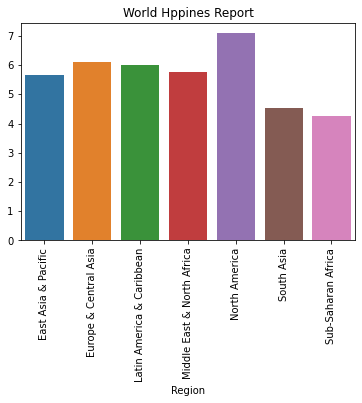

In [93]:
merge_region = happiness.merge(metadata,left_on='Country or region',right_on='TableName')

PromedioXregion = merge_region[['Region','Score']].groupby(['Region']).mean()

sns.barplot(x=PromedioXregion.index,y='Score',data=PromedioXregion)
plt.title('World Hppines Report')
plt.ylabel('')
plt.xticks(rotation=90)
